# 문제 정의

타이타닉 데이터를 이용하여 학습한 모델로 새로운 데이터를 바탕으로 생존할 수 있는지 예측해야한다.

### 구글드라이브를 마운트해서 구글드라이브와 연결함.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## kaggle을 colab환경에 설치하기

In [2]:
!pip install kaggle

## 폴더를 만들고 구글드라이브에 있는 kaggle.json파일을 새로 만든 폴더에 옮긴다.


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/'My Drive'/kaggle/kaggle.json ~/.kaggle/

## Permission Warning이 일어나지 않도록 권한 조정하기
## 참가한 모든 대회 보기

In [4]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started      Kudos        148           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2946           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      22871            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5017           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        710           False  
nlp-getting-started                            2030-01-01 00:00:00  Getting Started      Kudos       1463           False  
competit

## 캐글에서 타이타닉 데이터를 다운로드 받기

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 7.57MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.0MB/s]


##데이터셋이 제대로 불러와졌는지 확인하기

In [6]:
!ls

drive  gender_submission.csv  sample_data  test.csv  train.csv


## 관련 라이브러리들 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 먼저 확인하기


In [8]:
file_path = '/content/train.csv'

train_data = pd.read_csv(file_path)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 확인한 데이터 백업하고 제대로 백업이 되어있는지 확인



In [9]:
titanic_backup = train_data.copy()

titanic_backup.to_csv('/content/titanic_backup.csv')
!ls

file_path = '/content/titanic_backup.csv'
check_data = pd.read_csv(file_path)
print(check_data)

drive		       sample_data  titanic_backup.csv
gender_submission.csv  test.csv     train.csv
     Unnamed: 0  PassengerId  Survived  ...     Fare Cabin Embarked
0             0            1         0  ...   7.2500   NaN        S
1             1            2         1  ...  71.2833   C85        C
2             2            3         1  ...   7.9250   NaN        S
3             3            4         1  ...  53.1000  C123        S
4             4            5         0  ...   8.0500   NaN        S
..          ...          ...       ...  ...      ...   ...      ...
886         886          887         0  ...  13.0000   NaN        S
887         887          888         1  ...  30.0000   B42        S
888         888          889         0  ...  23.4500   NaN        S
889         889          890         1  ...  30.0000  C148        C
890         890          891         0  ...   7.7500   NaN        Q

[891 rows x 13 columns]


## 데이터 확인하기

In [10]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터를 확인해보니 Column은 11개가 있고, 데이터는 891개가 있는데 Age와 Cabin, Embarked에는 결측치가 있는 것 같다. 

또한 각 Column은 캐글에 잘 설명되어 있는데, PassengerId는 아마 탑승자이고 index대용으로 사용할 수 있을 것 같고, Survived는 생존 했느지와 안했는지, Pclass는 티켓의 클래스 즉 1등석 2등석 3등석을 얘기하는 것 같다, Sex는 성별, Age는 나이, SibSp는 남동생, 여동생, 이복 동생들, 남편이나 아내를 포함해서 몇 명 있는지, Parch는 부모이나 아이들이 합쳐서 몇 명이 있는지, Ticket은 티켓에 정보, Fare은 탑승자의 비용, Cabin은 선실 이름, Embarked는 어떤 항구에서 탑승했는 지에 대해서 나와있다.

## 데이터의 타입을 파악하고 연속형 데이터와 범주형 데이터로 나눠보려고 한다.

In [12]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터 타입을 파악해보니 Passengerld은 index인 것 같고 Survived, Pclass, Sex, Embarked은 범주형 데이터인 것 같고, Age, Fare은 연속형 데이터인 것 같다. 그리고 Sibsp, Parch는 지금 단적으로 보기에는 연속형 인것 같지만 자세히 살펴보고 연속형인지 범주형인지 판단을 내려야 할 것 같다. Name, Ticket, Cabin은 아마 연속형도 범주형도 아닌 데이터 인 것 같다. 이 Column들은 따로 기계학습을 하는데는 필요하지 않을 것 같다는 판단을 했다. 

## 데이터들을 연속형과 범주형으로 나눴으니, 이제 데이터 클린징을 하여 결측치들을 제거하거나 대체한다.

#### 먼저 데이터의 결측치가 있는 것들을 확인한다.

In [14]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

확인해보니 Cabin은 결측치가 687개로 데이터의 개수가 총 891개인 것을 봤을 때 너무 많은 데이터가 결측치임으로 이 Column을 제거하기로 했다. 결측치 데이터가 반 이상인 Column을 제거하는 코드를 사용했다.

In [16]:
train_data = train_data.dropna(thresh=int(len(train_data)*0.5), axis=1)

Cabin을 제거한 후 제대로 제거가 되었는지 확인해보았다.

In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

결측치를 제거했음으로 이제 Age, Embarked에 있는 결측치를 제거하려고한다. 연속형 데이터인 Age는 4분위수의 50%가 평균과 그렇게 큰 차이가 나지 않음으로  평균으로 채우고 범주형 데이터인 Embarked는 가장 많이 나온 값을 결측치에 넣으려고 한다. 먼저 Age의 결측치를 채우겠다.

In [18]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Age의 결측치를 평균으로 채운 후 다시 결측치를 확인했는데 결측치에 평균이 잘 채워졌음을 알 수 있었다. 그러면 다음으로 Embarked의 최빈 데이터가 무엇인지 확인해 보겠다.

In [21]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked에서 가장 많이 나오는 값은 S이므로 결측치를 S로 채웠다. (결측치는 보통 평균이나 최빈값으로 채우는데 범주형이기때문에 최빈값으로 채웠다.)

In [22]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Embarked의 결측치를 채운후 제대로 들어갔는지 확인했다.

## 그러면 이제 Sibsp와 Parch가 범주형으로 봐야할지 연속형으로 봐야할지 확인해보겠다.

In [24]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

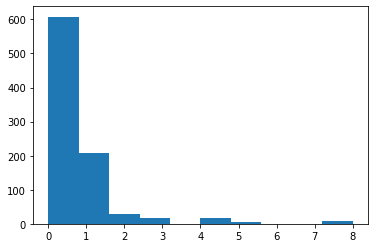

In [26]:
plt.hist(train_data.SibSp)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

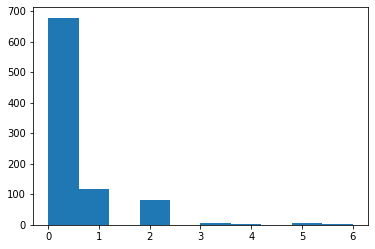

In [27]:
plt.hist(train_data.Parch)

시각화 하여 데이터를 확인해보니 범주형으로 나눠도 상관없겠지만, 7가지의 범주로 나누는 것 보다 연속형으로 두는 것이 더 괜찮을 것 같다는 생각을 했다.

## 몇몇의 데이터들을 시각화하여 분석하도록 했다.

In [28]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


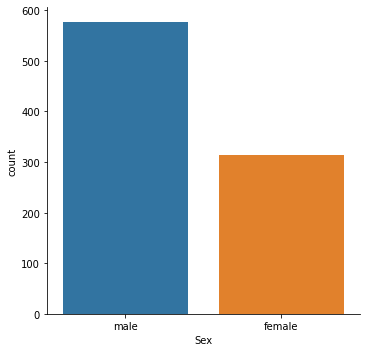

In [29]:
import seaborn as sns

sns.catplot('Sex', kind='count', data=train_data)

타이타닉데이터에는 남성이 여성보다 더 많은 것을 알 수 있는데 이것을 바탕으로 Survived와 Sex, Pclass, Embarked와 각각의 관계를 시본을 이용하 확인해 보겠다.

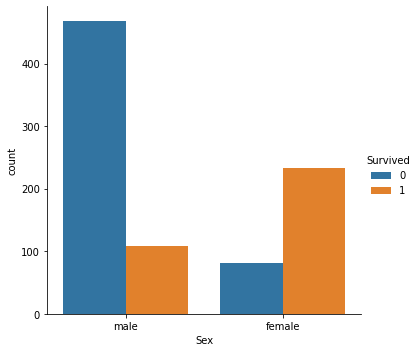

In [30]:
sns.catplot('Sex', kind='count', hue='Survived', data = train_data)

성별으로 생존을 확인해보면 타이타닉호 데이터에는 여성의 데이터보다 남성이 많지만 남성보다 많은 여성들이 생존했음을 알 수 있었다.

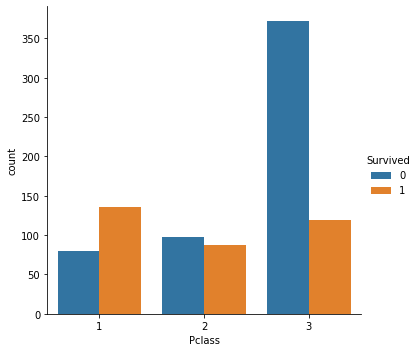

In [31]:
sns.catplot('Pclass', kind='count', hue='Survived', data=train_data)

단순히 시각적으로만 보아도 3등석은 많은 사람들이 탔음을 알 수 있고 또한 그래서 많은 사람들이 죽었음을 알 수 있었다. 1등석에 탄사람들은 2,3등석보다 많은 사람들이 살아 났음을 시각적으로 확인할 수 있었다.

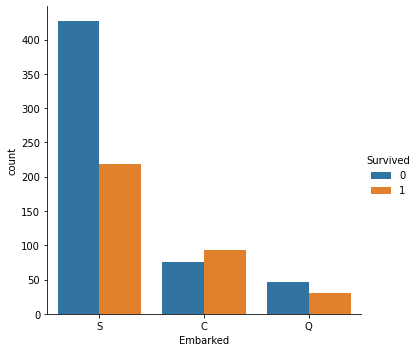

In [32]:
sns.catplot('Embarked', kind='count', hue='Survived', data=train_data)

Embarked에 값들인 S, C, Q는 C = Cherbourg, Q = Queenstown, S = Southampton로 항구이다. Southampton항구에서 가장 많은 사람들이 탔고, Cherbourg항구에서 그 다음으로 가장 적게는 Queenstown항구에서 탔는데 Cherbourg항구에서 탄 사람이 50%가 넘게 살아남앗다는 것을 알 수 있었다. Cherbourg항구가 아마 부유층사람들이 타지않았을까 싶고, Southampton항구에서는 아마 좀 더 가난한 사람들이 살지 않았을까 싶다. 타이타닉호가 대다수가 미국으로 이민을 가던 이민자들이었던 것을 생각해보면 Southampton항구에서 가난한 이민자들이 탑승했을 것 같다.

## 데이터의 위에 5개의 데이터를 확인하고 범주형은 category로 타입을 변경하기로 했다.

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [35]:
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [36]:
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

잘 변경됐는지 dtypes를 이용하여 확인하고 다음으로 학습에 관련이 없는 Column을 제거하기로 했다.

In [37]:
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)

In [38]:
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 44.8 KB


In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Name, Ticket을 제거하고 데이터를 확인한다.

연속형 데이터를 확인하고 이 데이터들을 히스토그램으로 시각화하여 연속형데이터를 분석했다.

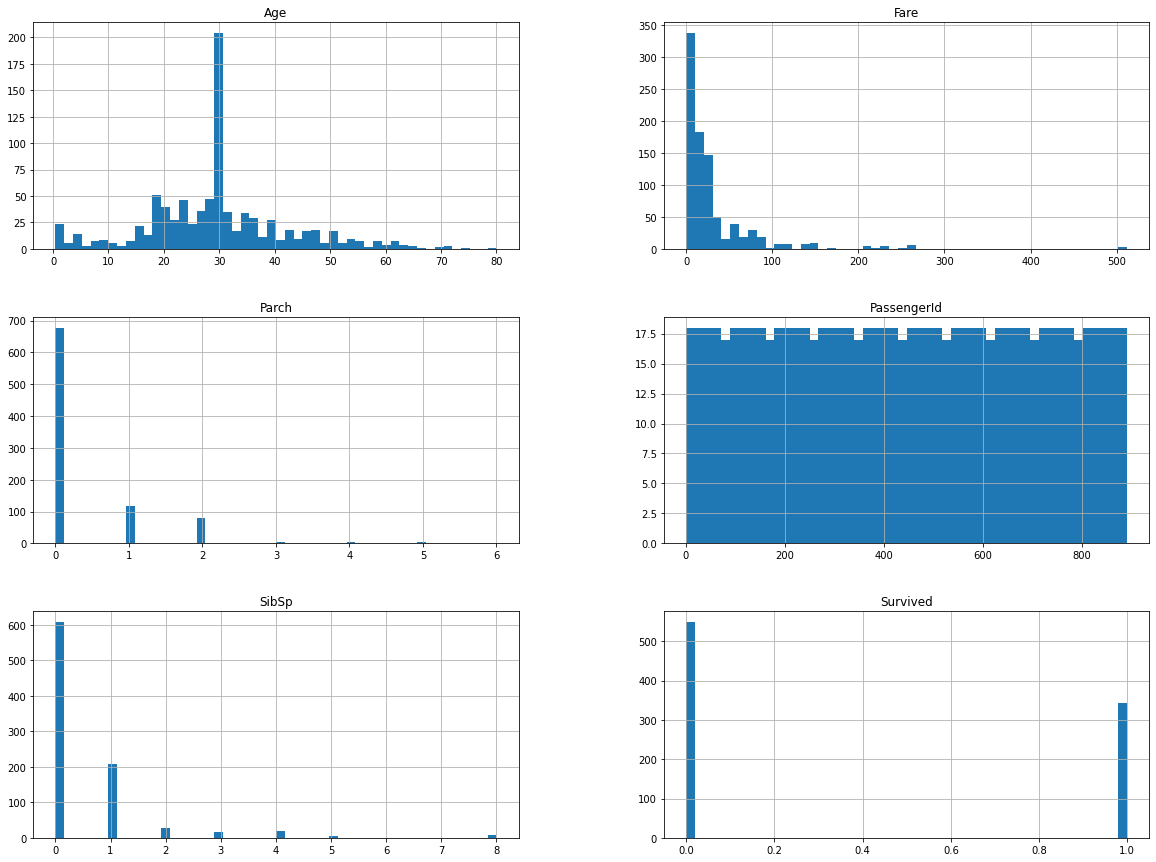

In [41]:
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

PassengerId는 학습에 불필요한 column이므로 column을 제거했다.

In [42]:
train_data = train_data.drop('PassengerId', axis=1)

In [43]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


이제 가장 중요한 Survived와 다른 특성 사이의 상관관계가 어떻게 되는지 확인해 보았다.

## Y값 정하기 

이 문제에서 데이터를 가지고 생존을 할 수 있는지 없는지 예측하기 위해서 모델을 구성하기 때문에 지금 나와있는 train data에 Y값으로 놓아야하는 값은 생존이므로 Column을 따로 뽑아서 y_train_data로 만들고 train_data를 x_train_data로 바꿨다.

In [44]:
y_train_data = train_data['Survived']

In [45]:
x_train_data = train_data.drop('Survived', axis=1)

In [46]:
x_train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [47]:
y_train_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

y값을 따로 빼놨으니 이제 편향되어 있지 않는지 확인해보고 범주형 데이터들을 one-hot encoding을 해서 학습에 사용하기 좋게 바꿨다.

In [48]:
y_train_data.value_counts() / len(y_train_data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

y값을 확인해보니 62%정도는 0(죽음)에 38%정도는 1(생존)으로 클래스가 나눠져 있다는 것을 알 수 있었다.

이제 one-hot encoding을 하려고 한다. 원핫 인코딩에 대한 자세한 부분은 https://programmers.co.kr/learn/courses/21/lessons/11044 링크를 참조하여 실행하였다.

In [49]:
x_train_data_c = pd.get_dummies(x_train_data)
x_train_data_c

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


이렇게 x데이터의 범주형 데이터를 one hot encoding으로 바꿨고 이제 연속형 변수들을 표준화 하거나 정규화하여 데이터를 학습에 이용하기 좋게 만들겠다.

In [50]:
x_train_data_c.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.725028
std,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


데이터를 우선적으로 확인해보니 평균이 Fare에 평균이 32인반면에 max값이 512이므로 데이터에 이상치가 존재하는 것 같다는 판단을 했고 이상치에 영향을 덜받는 표준화를 사용하기로 했다.

In [51]:
from sklearn.preprocessing import StandardScaler

x_train_data_n = x_train_data_c[['Age', 'SibSp', 'Parch', 'Fare']]

scaler = StandardScaler()
scaler.fit(x_train_data_n)
X_scaled = scaler.transform(x_train_data_n)
X_scaled

array([[-0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [ 0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.17706291, -0.4745452 , -0.47367361, -0.49237783]])

In [52]:
np.mean(X_scaled), np.std(X_scaled)

(8.024507607840638e-17, 1.0)

In [53]:
X_scaled.shape

(891, 4)

In [54]:
x_train_data_c[['Age', 'SibSp', 'Parch', 'Fare']] = X_scaled

In [55]:
x_train_data_c

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0,0,1,0,1,0,0,1
1,0.638789,0.432793,-0.473674,0.786845,1,0,0,1,0,1,0,0
2,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1,1,0,0,0,1
3,0.407926,0.432793,-0.473674,0.420730,1,0,0,1,0,0,0,1
4,0.407926,-0.474545,-0.473674,-0.486337,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0,1,0,0,1,0,0,1
887,-0.823344,-0.474545,-0.473674,-0.044381,1,0,0,1,0,0,0,1
888,0.000000,0.432793,2.008933,-0.176263,0,0,1,1,0,0,0,1
889,-0.284663,-0.474545,-0.473674,-0.044381,1,0,0,0,1,1,0,0


In [56]:
x_train_data_c.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.725028
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.446751
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


표준화를 하면 항상 평균이 0이된다고 했는데 평균 0이아니라서 이상하다고 생각했지만 e-17이면 0에 거의 가까운 값이 되므로 문제가 없다고 생각하고 분산은 1이되었기 때문에 표준화를 완료했다.

In [57]:
file_path = '/content/test.csv'
test_data = pd.read_csv(file_path)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


이제 train data에 전처리가 완료되었음으로 같은 방식으로 test data도 전처리하려고한다. 이부분은 따로 설명을 하며 진행하지는 않겠다.

In [58]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Name', axis=1)
test_data = test_data.drop('Ticket', axis=1)

In [60]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [61]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [62]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [63]:
test_data['Sex'] = test_data['Sex'].astype('category')
test_data['Pclass'] = test_data['Pclass'].astype('category')
test_data['Embarked'] = test_data['Embarked'].astype('category')
test_data.dtypes

PassengerId       int64
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [64]:
x_test_data_c = pd.get_dummies(test_data)
x_test_data_c

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.00000,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.00000,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.00000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.00000,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.50000,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1


In [65]:
x_test_data_n = x_test_data_c[['Age', 'SibSp', 'Parch', 'Fare']]

scaler = StandardScaler()
scaler.fit(x_test_data_n)
X_scaled = scaler.transform(x_test_data_n)
X_scaled
np.mean(X_scaled), np.std(X_scaled)

(-1.1686558153949016e-17, 1.0)

In [66]:
x_test_data_c[['Age', 'SibSp', 'Parch', 'Fare']] = X_scaled
x_test_data_c

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.334993,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,1,0
1,893,1.325530,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,0,1
2,894,2.514175,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,1,0
3,895,-0.259330,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,0,1
4,896,-0.655545,0.616992,0.619896,-0.418471,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1
414,1306,0.691586,-0.499470,-0.400248,1.313753,1,0,0,1,0,1,0,0
415,1307,0.651965,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,0,1
416,1308,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1


만들어진 트레이닝 데이터에서 검증세트를 만들어서 모델을 평가할 때 정확도가 얼마나 되는지 확인하려고한다.

In [67]:
from sklearn.model_selection import train_test_split

x_train_data1, x_validation_data, y_train_data1, y_validation_data = train_test_split(x_train_data_c, y_train_data, test_size=0.2, random_state=42)
x_train_data1.shape, x_validation_data.shape, y_train_data1.shape, y_validation_data.shape

((712, 12), (179, 12), (712,), (179,))

## 이제 모델을 선택하고 선택한 모델을 학습시킨다.

VotingClassifier을 이용하면 각각의 분류기의 정확도를 알아보고 가장 높은 값으로 나오는 모델을 사용하여 전체데이터를 다시 학습시키고 테스트셋에 데이터들을 예측하도록 하겠다.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [69]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft'
)
voting_clf.fit(x_train_data1, y_train_data1)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [70]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train_data1, y_train_data1)
  y_pred = clf.predict(x_validation_data)
  print(clf.__class__.__name__, accuracy_score(y_validation_data, y_pred))

LogisticRegression 0.7988826815642458
RandomForestClassifier 0.7988826815642458
SVC 0.8156424581005587
VotingClassifier 0.8156424581005587


가중치값이 매번 변하기 때문에 random_state를 이용하여 한값으로 변하지 않게 조정해 놓고 학습을 시켜서 가장 좋은것을 확인해 보았다. 본 값들 중에서는 가장 정확도가 높은 값은 SVC와 VotingClassifier인데 나는 이중에서 SVC를 사용하고 전체데이터를 학습한 후에 테스트 데이터를 넣어 평가하고 제출하도록 하겠다.

In [71]:
final_svm_clf = SVC(gamma='auto', probability=True, random_state=42)

final_svm_clf.fit(x_train_data_c, y_train_data)
test_data = x_test_data_c.drop('PassengerId', axis=1).copy()
prediction = final_svm_clf.predict(test_data)

submission = pd.DataFrame({
        "PassengerId": x_test_data_c['PassengerId'],
        "Survived": prediction
    })
 
submission.to_csv('submission_test1.csv', index=False)
submission = pd.read_csv('submission_test1.csv')
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


케글에 제출결과를 사진으로 표시했다. 대략 0.78% 정도의 정확도를 가지고 있고 등수는 5800등정도를 했다.

In [72]:
!cp /content/drive/'My Drive'/제출결과.png /content/
!cp /content/drive/'My Drive'/케글등수.png /content/

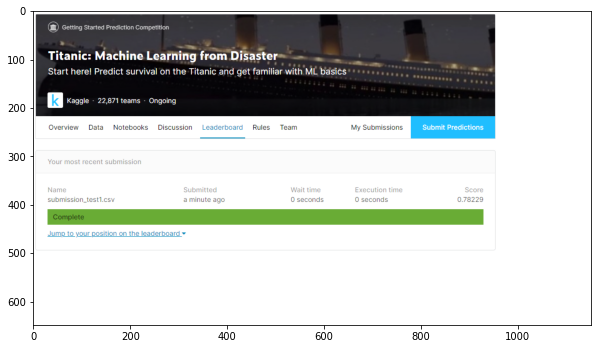

In [73]:
a = plt.imread('/content/제출결과.png')
plt.figure(figsize=(10, 10))
plt.imshow(a)

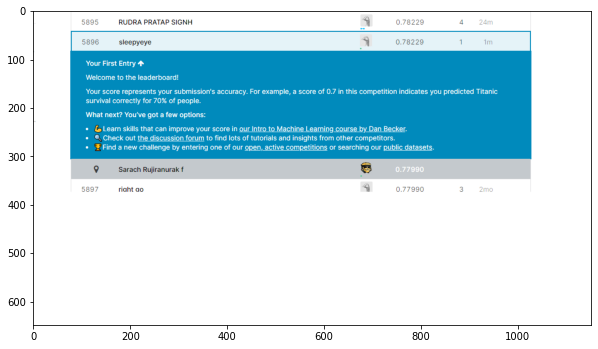

In [74]:
b = plt.imread('/content/케글등수.png')
plt.figure(figsize=(10, 10))
plt.imshow(b)